Michael Dasseville

<h1><center>TSIA 2013 Introduction to Deep Learning</center></h1>
<h2><center>MNIST classification using a FCN</center></h2>
<center>Email the complete notebook to attilio.fiandrotti@telecom-paristech.fr</center>

# Installing and importing Keras

In [1]:
# Importing the Keras main module: different backends will have different data ordering:
# theano backend: NCHW
# tensorflow backend: NHWC 
import keras

# Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets
Verify the amount of system memory available before and after loading the dataset.

In [2]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
# START CODE HERE
from psutil import virtual_memory
print(virtual_memory())
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(virtual_memory())
# END CODE HERE

svmem(total=17107861504, available=9375297536, percent=45.2, used=7732563968, free=9375297536)
svmem(total=17107861504, available=9315676160, percent=45.5, used=7792185344, free=9315676160)


Using the pyplot package, visualize the fist sample of the trainig set

In [3]:
# Let us visualize the first training sample using the Gnuplot library
from matplotlib import pyplot as plt
# START CODE HERE
for num in range(0,5):
    dt = next(iter(x_train))
    tt = next(iter(y_train))
    plt.subplot(1,5,num+1)
    plt.imshow(dt)
    plt.title(tt)
# END CODE HERE

Turn train and test labels to one-hot encoding

In [4]:
print(y_train[15])

7


In [5]:
from keras.utils.np_utils import to_categorical
# START CODE HERE
y_train = to_categorical(y_train, num_classes=10, dtype='float32')
y_test = to_categorical(y_test, num_classes=10, dtype='float32')
# END CODE HERE
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


Reshape train and test images so that they follow the Tensoflow NWHC ordering.
Then, normalize the images so that they have zero-mean (approximate solutions are ok)

In [6]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = 28, 28
#train_images = train_images.reshape(...)
# START CODE HERE
x_train = x_train.reshape(60000,img_rows, img_cols,order='C')
x_test = x_test.reshape(10000,img_rows, img_cols,order='C')
# END CODE HERE

# Now let us normalize the image in the [0-1] range paying attention to use floats rather than uint8
#train_images = train_images.astype('float32')
# START CODE HERE
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# END CODE HERE

# Defining the neural network architecture (i.e., the network model)

Create a LeNet300-like fully connected network taking in input the images as vectors of pixels and suitable to classify each image across 10 different classes. For this first implementation of the network, use only sigmoid activations.

In [7]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE
model = Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(units=300, input_dim=28*28))
model.add(Activation('sigmoid'))

model.add(Dense(units=100, input_dim=300))
model.add(Activation('sigmoid'))

model.add(Dense(units=10, input_dim=100))
model.add(Activation('softmax'))
# END CODE HERE
# Let us have a look at the model topology
keras.utils.print_summary(model)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
acti

Instantiate a SGD optimizer with a tentative LR of 10^-4 and using the appropriate loss function and compile the model.

In [8]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to teh computed error gradints
from keras import optimizers

# START CODE HERE
myop = optimizers.SGD(lr=0.0001)
model.compile(optimizer=myop,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# END CODE HERE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

# Training the network

Train the model for 10 epochs using the fit() method, without batch training initially validating the model at each epoch and keeping track of the training history.

In [9]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),epochs=epochs)
# END CODE HERE

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 2.4030 - acc: 0.1249 - val_loss: 2.3098 - val_acc: 0.1597
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 2.2591 - acc: 0.2307 - val_loss: 2.2060 - val_acc: 0.3131
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 2.1757 - acc: 0.3377 - val_loss: 2.1373 - val_acc: 0.3890
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 2.1154 - acc: 0.4055 - val_loss: 2.0829 - val_acc: 0.4537
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 2.0647 - acc: 0.4756 - val_loss: 2.0346 - val_acc: 0.5201
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 2.0183 - acc: 0.5407 - val_loss: 1.9890 - val_acc: 0.5720
Epoch 7/10
60000/60000 [==============================] - 6s 107us/step - 

# Visualizing the network performance
Visualize the training history using the pyplot package: plot in one graph the train and vaidation loss functions, in another graph the train and validation accuracy

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


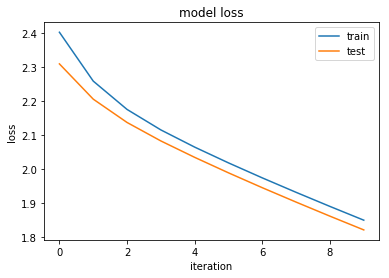

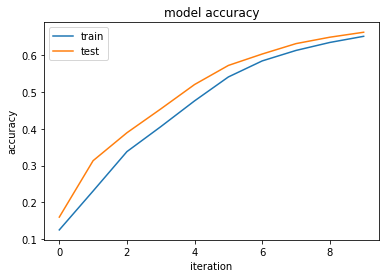

In [10]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train','test'])
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['train','test'])
# END CODE HERE
plt.show()


# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the trained network).

Then,  experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the batch size (from purely stochastic case) and compare performance with reference.
*  Experiment gradually increasing the learning rate starting from 10^-4 and find a reasonable learning rate value the network can tolerate without diverging.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Calculate the complexity of the first fully connected layer in terms of number of learnable parameters.




